## Biological Background on the Dataset and Motivations

This dataset contains data from an analysis of invasive breast cancer carcinoma.Since this is a subject I wasn't very familiar with but wanted to explore and use for this project. I did use ChatGTP to help with some of the summarization of the details of the data described in recommended papers on the subject. Below is a description from the source of the dataset followed by some definitions of the molecular 4 main features called "omics" or the molecular layers of tumor samples involved in the breast cancer study. This information is to give insight into what the data means and helps with cross feature selection for modeling.

**Analysis**

The multi-omics data from breast invasive carcinoma project of The Cancer Genome Atlas (TCGA) is downloaded and analyzed. A subset of the data is chosen according to the clinical information of the patients.

**Kaggle Description and Motivations**

There are 705 breast cancer samples. The dataset contains four different omics data types (1936 features in total).

 - cn: copy number variations (n=860)
 - mu: mutations (n=249)
 - rs: gene expression (n=604)
 - pp: protein levels (n=223)

What type of multi-omics prediction models can we build?
Where are the strengths/weaknesses of different methods?
Can we show why it is meaningful to integrate different data types?

**Summary of the omic data**

The information are generated descriptions summaries of the omic data

Each omics modality has extremely high dimensionality (e.g., thousands of genes or protein 
measurements) but represents very different biological processes:

- CNVs → genomic structural variation  
- Mutations → discrete genetic alterations  
- RNA → continuous transcriptional activity  
- Protein → downstream functional abundance  

**Copy Number Variation (CNV):**  
CNVs represent large chromosomal gains or losses. High CNV burden is a hallmark of genomic 
instability and strongly influences downstream RNA and protein levels (Beroukhim et al., 2010; 
Taylor et al., 2018). CNVs often drive oncogene amplification or tumor suppressor deletions.

**Mutation Burden:**  
Mutations alter protein-coding regions directly. Tumors with mutation-dominant profiles are 
driven more by point mutations than by large-scale genomic alterations (Vogelstein et al., 2013).

**RNA Expression (ExprLevelTier):**  
RNA levels reflect transcriptional activity. Because expression values span several orders of 
magnitude and contain noise, tiering them into quartiles (Q1–Q4) provides a stable categorical 
representation used widely in cancer transcriptomics (Risso et al., 2018; Subramanian et al., 2005).

**Protein Abundance:**  
Protein levels integrate upstream signals from CNV, mutation, and RNA processes. Proteomics often 
reveals post-transcriptional and post-translational regulation not visible at the RNA level 
(Aebersold & Mann, 2016).

**OmicDominant:**  
This variable indicates which molecular layer is most influential in the sample (CNV vs Mutation 
vs RNA vs Protein). Multi-omic studies show that tumors cluster by the dominant modality driving 
their biology (Hoadley et al., 2014; Cheng et al., 2013).

### Kaggle Dataset
https://www.kaggle.com/datasets/samdemharter/brca-multiomics-tcga?select=brca_data_w_subtypes.csv



### Biological References

Taylor, A.M., et al. (2018). *Genomic and Functional Approaches to Understanding Cancer Aneuploidy*. Cancer Cell, 33(4), 676–689. https://doi.org/10.1016/j.ccell.2018.03.007

Beroukhim, R., et al. (2010). *The landscape of somatic copy-number alteration across human cancers*. Nature, 463, 899–905. https://doi.org/10.1038/nature08822

Hoadley, K.A., et al. (2014). *Multiplatform Analysis of 12 Cancer Types Reveals Molecular Classification Across Tissues*. Cell, 158(4), 929–944. https://doi.org/10.1016/j.cell.2014.06.049

Cheng, Y., et al. (2013). *Integrative analysis of multi-omics data*. Nature Reviews Genetics, 14, 715–728. https://doi.org/10.1038/nrg3646

Subramanian, A., et al. (2005). *Gene Set Enrichment Analysis*. PNAS, 102(43), 15545–15550. https://doi.org/10.1073/pnas.0506580102

Risso, D., et al. (2018). *Normalization of RNA-seq data*. Nature Reviews Genetics, 19, 140–150. https://doi.org/10.1038/nrg.2017.76

Vogelstein, B., et al. (2013). *Cancer Genome Landscapes*. Science, 339, 1546–1558. https://doi.org/10.1126/science.1235122

Li, L., et al. (2017). *Comprehensive multi-omics analysis*. Nature Communications, 8, 1428. https://doi.org/10.1038/s41467-017-01520-w

In [9]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/brca_data_w_subtypes.csv')
print("Dataset Shape: ", df.shape)
print("Dataset Columns: ", display(df.columns[:12]))
df.select_dtypes(include='object').head()
display(df.head())
df.info()


Dataset Shape:  (705, 1941)


Index(['rs_CLEC3A', 'rs_CPB1', 'rs_SCGB2A2', 'rs_SCGB1D2', 'rs_TFF1',
       'rs_MUCL1', 'rs_GSTM1', 'rs_PIP', 'rs_ADIPOQ', 'rs_ADH1B', 'rs_S100A7',
       'rs_HMGCS2'],
      dtype='object')

Dataset Columns:  None


,rs_CLEC3A,rs_CPB1,rs_SCGB2A2,rs_SCGB1D2,rs_TFF1,rs_MUCL1,rs_GSTM1,rs_PIP,rs_ADIPOQ,rs_ADH1B,...,pp_p62.LCK.ligand,pp_p70S6K,pp_p70S6K.pT389,pp_p90RSK,pp_p90RSK.pT359.S363,vital.status,PR.Status,ER.Status,HER2.Final.Status,histological.type
0,0.892818,6.580103,14.123672,10.606501,13.189237,6.649466,10.520335,10.338490,10.248379,10.229970,...,-0.691766,-0.337863,-0.178503,0.011638,-0.207257,0,Positive,Positive,Negative,infiltrating ductal carcinoma
1,0.000000,3.691311,17.116090,15.517231,9.867616,9.691667,8.179522,7.911723,1.289598,1.818891,...,0.279067,0.292925,-0.155242,-0.089365,0.267530,0,Positive,Negative,Negative,infiltrating ductal carcinoma
2,3.748150,4.375255,9.658123,5.326983,12.109539,11.644307,10.517330,5.114925,11.975349,11.911437,...,0.219910,0.308110,-0.190794,-0.222150,-0.198518,0,Positive,Positive,Negative,infiltrating ductal carcinoma
3,0.000000,18.235519,18.535480,14.533584,14.078992,8.913760,10.557465,13.304434,8.205059,9.211476,...,-0.266554,-0.079871,-0.463237,0.522998,-0.046902,0,Positive,Positive,Negative,infiltrating ductal carcinoma
4,0.000000,4.583724,15.711865,12.804521,8.881669,8.430028,12.964607,6.806517,4.294341,5.385714,...,-0.441542,-0.152317,0.511386,-0.096482,0.037473,0,Positive,Positive,Negative,infiltrating ductal carcinoma


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Columns: 1941 entries, rs_CLEC3A to histological.type
dtypes: float64(827), int64(1110), object(4)
memory usage: 10.4+ MB


## Dataset Attributes

**Dataset shape:** 705 samples × 1,941 total features

**Column indexes:** <b>rs_CLEC3A, rs_CPB1, rs_SCGB2A2, rs_SCGB1D2, rs_TFF1</b>
(These columns are referring to RNA gene expression features with each one prefixed with rs_)

**4 Object Types and Descriptions**

These 4 are Categorical Clinical Pathology Annotations 
(ChatGTP Generated from the source material for understanding)

 - PR.Status: `PR = Progesterone Receptor`
    - Values usually like: Positive, Negative, Indeterminate
    - Indicates whether tumor cells express progesterone hormone receptors
    - Important for breast cancer subtype classification and treatment selection
    - PR+ tumors tend to respond better to hormone therapies

- ER.Status: `ER = Estrogen Receptor`
    - Values: Positive, Negative, Indeterminate
    - One of the most important biomarkers in breast cancer
    - ER+ tumors depend on estrogen signaling
    - Determines treatment and prognosis

- HER2.Final.Status: `HER2 = Human Epidermal Growth Factor Receptor 2`
    - Values: HER2+, HER2−, maybe Equivocal
    - HER2 overexpression/amplification marks a highly aggressive subtype
    - HER2+ tumors respond strongly to targeted therapies

- histological.type: `Pathology-based Tissue Subtype`
    - Values: IDC infiltrating ductal carcinoma, ILC Invasive Lobular Carcinoma
    - morphological category of the tumor under the microscope
    - Used as a classification label describing tumor histology

I needed help with the descriptions since I was unfamiliar with what the features meant. This also helps the reader to understand the data and how the data preparation deals with them.

## Data Cleaning 

I want to remove all the non-numeric and non-omic data to retain the most meaningful molecular data for the network. The clinical categorical data such as ER, PR, HER2, and histological.type will be excluded as they don't provide any predictive value. Zero variance variables will be removed since they don't provide informative signal to the model as such an omic column with all zeros. After cleaning only the omic numeric columns will be left for PCA. 

In [11]:
clean_df = df.copy()

# Drop null values
clean_df = clean_df.dropna(axis=0)

# Clinical variables to remove
clinical_cols_vars = [
    "vital.status",
    "PR.Status",
    "ER.Status",
    "HER2.Final.Status",
    "histological.type"
]

clinical_cols_vars = [c for c in clinical_cols_vars if c in clean_df.columns]
clean_df.drop(columns=clinical_cols_vars, inplace=True, axis=1, errors='ignore')


# Making sure to remove all non-numeric columns
non_num_cols = clean_df.select_dtypes(include='object').columns.tolist()
clean_df.drop(columns=non_num_cols, inplace=True)

# Removing columns with zero variance and constants and count
num_before = clean_df.shape[1]
clean_df = clean_df.loc[:, clean_df.nunique() > 1] # Get all non zero cols
num_removed = num_before - clean_df.shape[1]
print(f'Removed {num_removed} columns')

# Keeping only columns with omic prefix
omic_prefix = ['rs_','mu_','pp_','cn_']
omic_cols = [c for c in clean_df.columns if any(c.startswith(p) for p in omic_prefix)]

omics_df = clean_df[omic_cols].copy()

print(f'Clean data with omic cleaning: {omics_df.shape}')

Removed 0 columns
Clean data with omic cleaning: (560, 1936)


## PCA Variance Analysis (omics)

The dataset contains 1,941 molecular features and only 705 samples making the number of features much greater than the samples. This can be challenging in training a neural network due to noisy data, with 1000+ expression features and 100s Copy Number Variation (CNV) observations. Also, there is a risk of overfitting as the network can memorize the training data affecting generalization. 

The 1,941 features come from the omic modalities categories described earlier with each of them being on different scales and variance. For that reason dimensionality reduction must be performed within each one separately. But before PCA is performed there needs to be some verification of the amount of variance captured. Im hoping for at least 80% variance capture across omic components.


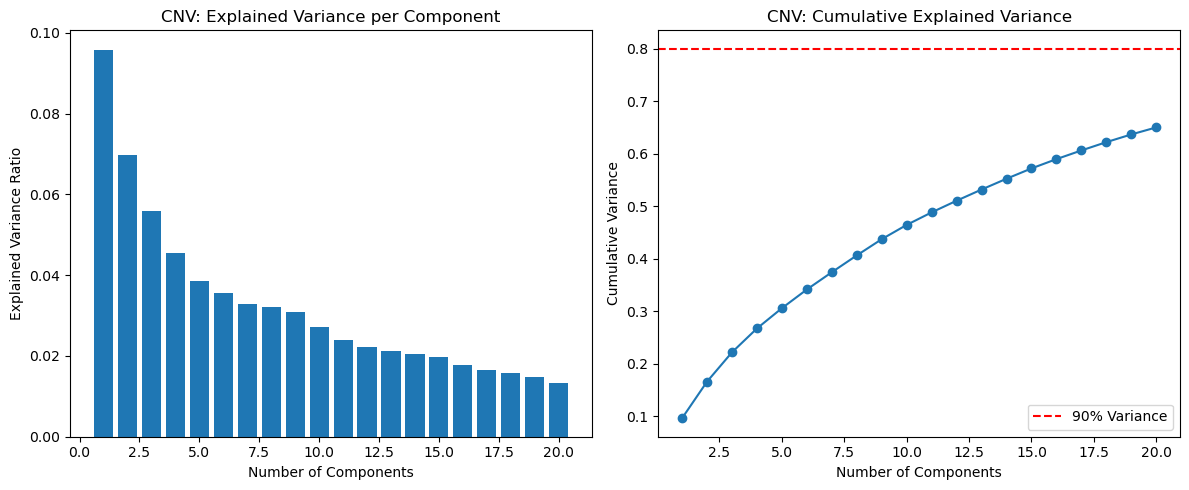

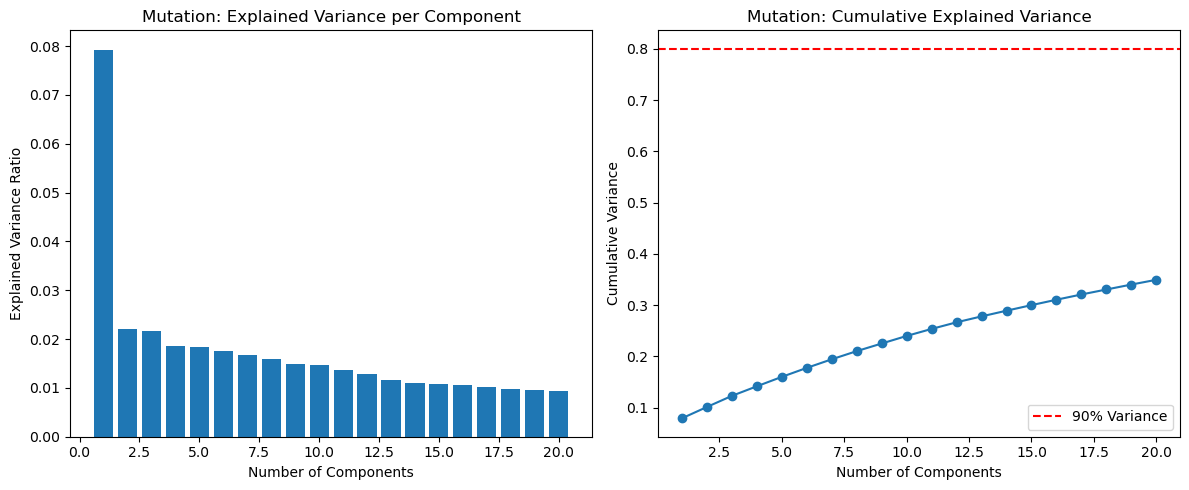

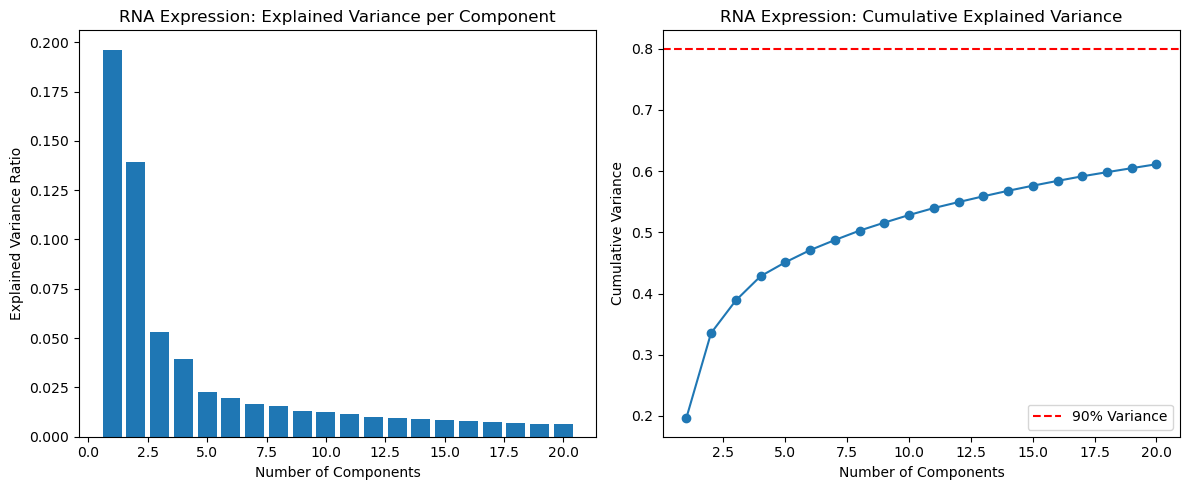

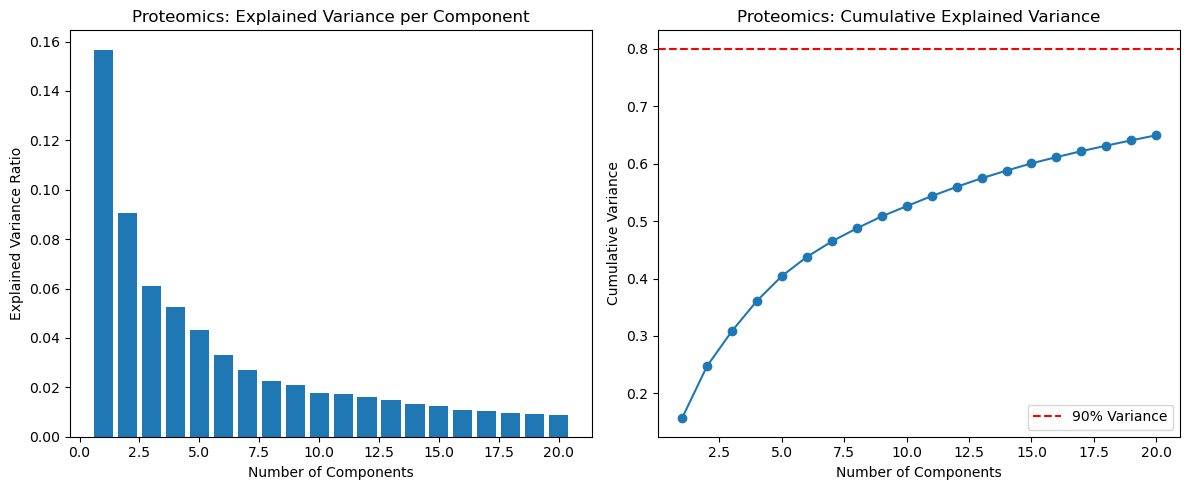

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

# Plotting for each omic feature
def pca_plot(df_input, cols, feature_name, max_components=20):
    X = df_input[cols].to_numpy().astype(np.float32)
    scaled_X = StandardScaler().fit_transform(X)
    
    pca = PCA(n_components=min(max_components, scaled_X.shape[1]), random_state=42)
    pca.fit(scaled_X)
    
    explained_variance = pca.explained_variance_ratio_
    cumulative = np.cumsum(explained_variance)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance)
    plt.title(f"{feature_name}: Explained Variance per Component")
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative) + 1), cumulative, marker='o')
    plt.axhline(0.8, color='red', linestyle='--',label='90% Variance')
    plt.title(f"{feature_name}: Cumulative Explained Variance")
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance')
    plt.legend(loc='best')
    
    plt.tight_layout()
    plt.show()

# Getting the omic cols from the cleaned dataset
cn_cols = [c for c in omics_df.columns if c.startswith("cn_")]
mu_cols = [c for c in omics_df.columns if c.startswith("mu_")]
rs_cols = [c for c in omics_df.columns if c.startswith("rs_")]
pp_cols = [c for c in omics_df.columns if c.startswith("pp_")]

pca_plot(omics_df, cn_cols, "CNV")
pca_plot(omics_df, mu_cols, "Mutation")
pca_plot(omics_df, rs_cols, "RNA Expression")
pca_plot(omics_df, pp_cols, "Proteomics")